In [1]:
import numpy as np
import nibabel as nib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
damage = pd.read_csv('/home/despoB/dlurie/Projects/despolab_lesion/analysis/damage_all.csv', index_col='pid')

In [4]:
ms = pd.read_csv('/home/despoB/dlurie/Projects/despolab_lesion/analysis/ms.csv', index_col='pid')

/home/despoB/dlurie/anaconda3/envs/sandbox/lib/python3.5/site-packages/seaborn/linearmodels.py:303: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return (a_prime + a_mean).reshape(a.shape)


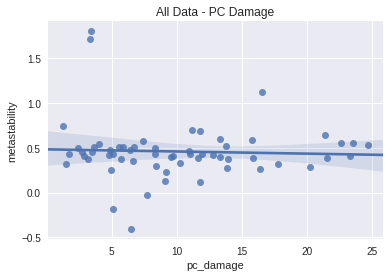

In [77]:
sns.regplot(damage.pc_damage, ms.metastability, y_partial=ms.MeanFD)
#plt.ylim(0, 0.9)
plt.title("All Data - PC Damage")

/home/despoB/dlurie/anaconda3/envs/sandbox/lib/python3.5/site-packages/seaborn/linearmodels.py:303: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return (a_prime + a_mean).reshape(a.shape)


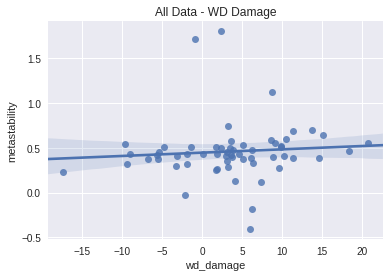

In [78]:
sns.regplot(damage.wd_damage, ms.metastability, y_partial=ms.MeanFD)
#plt.ylim(0, 0.9)
plt.title("All Data - WD Damage")

In [27]:
acq64_file = '/home/despoB/dlurie/Projects/despolab_lesion/derivatives/has_acq-64px.txt'
acq64_list = np.loadtxt(acq64_file, dtype='int')
#acq64_list = [str(i) for i in acq64_list]

/home/despoB/dlurie/anaconda3/envs/sandbox/lib/python3.5/site-packages/seaborn/linearmodels.py:303: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return (a_prime + a_mean).reshape(a.shape)


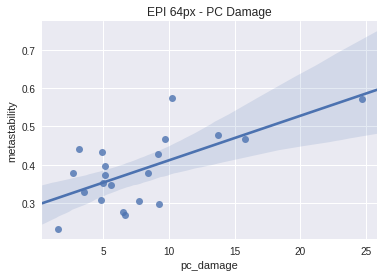

In [79]:
sns.regplot(damage.loc[acq64_list,'pc_damage'].dropna(), ms.loc[acq64_list,'metastability'].dropna(),
           y_partial=ms.loc[acq64_list,'MeanFD'].dropna())
#plt.ylim(0, 0.9)
plt.title("EPI 64px - PC Damage")

In [31]:
stats.pearsonr(pc_damage.pc_damage, ms.metastability)

(0.56574513597457332, 0.007515760775679667)

/home/despoB/dlurie/anaconda3/envs/sandbox/lib/python3.5/site-packages/seaborn/linearmodels.py:303: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return (a_prime + a_mean).reshape(a.shape)


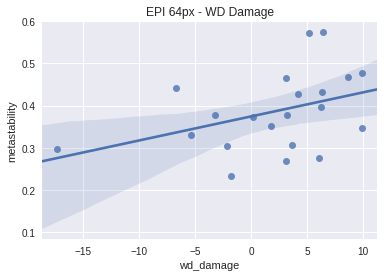

In [80]:
sns.regplot(damage.loc[acq64_list,'wd_damage'].dropna(), ms.loc[acq64_list,'metastability'].dropna(),
           y_partial=ms.loc[acq64_list,'MeanFD'].dropna())
#plt.ylim(0, 0.9)
plt.title("EPI 64px - WD Damage")

In [38]:
acq128_file = '/home/despoB/dlurie/Projects/despolab_lesion/derivatives/has_acq-128px.txt'
acq128_list = np.loadtxt(acq128_file, dtype='int')
#acq64_list = [str(i) for i in acq64_list]

/home/despoB/dlurie/anaconda3/envs/sandbox/lib/python3.5/site-packages/seaborn/linearmodels.py:303: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return (a_prime + a_mean).reshape(a.shape)


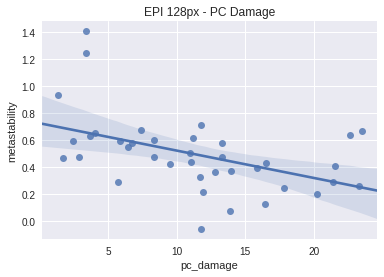

In [81]:
sns.regplot(damage.loc[acq128_list,'pc_damage'].dropna(), ms.loc[acq128_list,'metastability'].dropna(),
           y_partial=ms.loc[acq128_list,'MeanFD'].dropna())
#plt.ylim(0, 0.9)
plt.title("EPI 128px - PC Damage")

In [31]:
stats.pearsonr(pc_damage.pc_damage, ms.metastability)

(0.56574513597457332, 0.007515760775679667)

/home/despoB/dlurie/anaconda3/envs/sandbox/lib/python3.5/site-packages/seaborn/linearmodels.py:303: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return (a_prime + a_mean).reshape(a.shape)


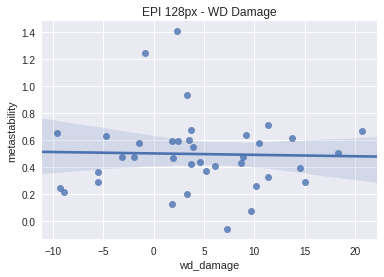

In [82]:
sns.regplot(damage.loc[acq128_list,'wd_damage'].dropna(), ms.loc[acq128_list,'metastability'].dropna(),
           y_partial=ms.loc[acq128_list,'MeanFD'].dropna())
#plt.ylim(0, 0.9)
plt.title("EPI 128px - WD Damage")

In [ ]:
ms_data = []
for acq in ['128px','64px']:
    # Load list of subjects with the specified EPI sequence.
    sublist_file = '/home/despoB/dlurie/Projects/despolab_lesion/derivatives/has_acq-{0}.txt'.format(acq)
    subject_list = np.loadtxt(sublist_file, dtype='int')
    subject_list = [str(i) for i in subject_list]
    
    confounds_fpt = '/home/despoB/dlurie/Projects/despolab_lesion/preproc/out/fmriprep/sub-101/func/sub-101_task-rest_acq-128px_run-01_bold_confounds.tsv
    
    for pid in subject_list:
        if pid not in skip:
            ts = np.load(ts_fpt.format(pid, acq))
            ms = metastability(ts[:,roi_ids])
            ms_data.append((pid, ms))

In [47]:
motion_test = pd.read_csv('/home/despoB/dlurie/Projects/despolab_lesion/preproc/out/fmriprep/sub-101/func/sub-101_task-rest_acq-128px_run-01_bold_confounds.tsv', sep='\t')

In [61]:
pd.to_numeric(motion_test.FramewiseDisplacement[:-1]).mean()

0.11241315014715719

In [63]:
101 in acq128_list

True

In [65]:
confounds_fpt = '/home/despoB/dlurie/Projects/despolab_lesion/preproc/out/fmriprep/sub-{0}/func/sub-{0}_task-rest_acq-{1}_run-01_bold_confounds.tsv'

In [67]:
ms['MeanFD'] = 0
ms['sequence'] = 'NaN'
for pid in ms.index:
    if pid in acq128_list:
        confounds_df = pd.read_csv(confounds_fpt.format(pid, '128px'), sep='\t')
        mean_fd = pd.to_numeric(confounds_df.FramewiseDisplacement[:-1]).mean()
        ms.loc[pid, 'MeanFD'] = mean_fd
        ms.loc[pid, 'sequence'] = '128px'
    if pid in acq64_list:
        confounds_df = pd.read_csv(confounds_fpt.format(pid, '64px'), sep='\t')
        mean_fd = pd.to_numeric(confounds_df.FramewiseDisplacement[:-1]).mean()
        ms.loc[pid, 'MeanFD'] = mean_fd
        ms.loc[pid, 'sequence'] = '64px'

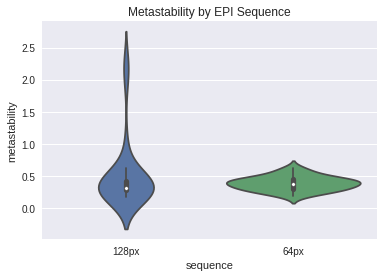

In [71]:
sns.violinplot(x='sequence', y='metastability', data=ms)
plt.title('Metastability by EPI Sequence')

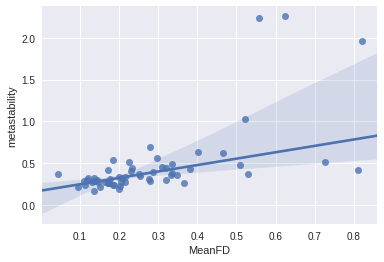

In [75]:
sns.regplot(x='MeanFD', y='metastability', data=ms, robust=True)